In [2]:
N = ord("Y") % 10 + 1
print(N)

10


$$
\begin{cases}
-10.2x_1 + 9.3x_2 = 73 \\
5.3x_1 + 15.8x_2 = 173 \\
17.2x_1 + 10.3x_2 = 159
\end{cases}
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

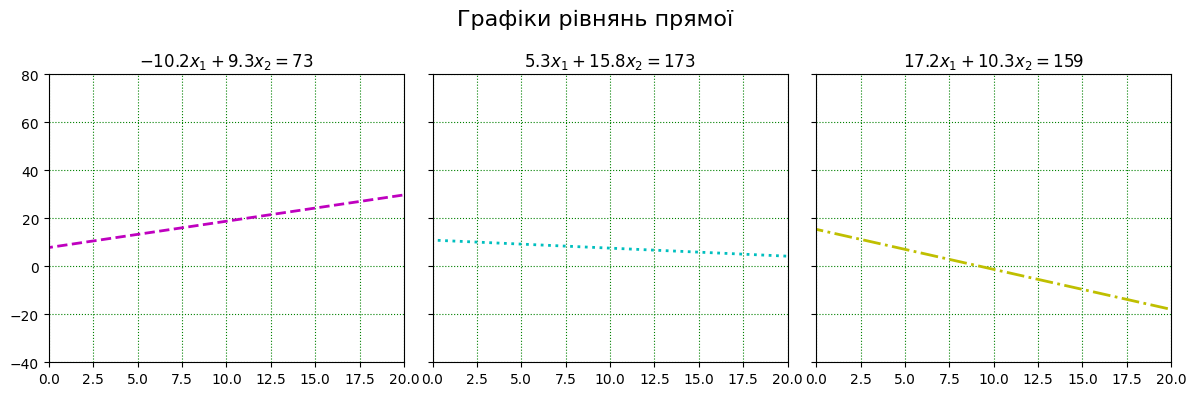

In [13]:
x = np.linspace(-20, 20, 200)
 
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey =True)

ax[0].plot(x, (73 + 10.2*x) / 9.3, 'm--', linewidth = 2)
ax[1].plot(x, (173 - 5.3*x) / 15.8, 'c:', linewidth = 2)
ax[2].plot(x, (159 - 17.2*x) / 10.3, 'y-.', linewidth = 2)

ax[0].set_title("$-10.2x_1 + 9.3x_2 = 73$")
ax[1].set_title("$5.3x_1 + 15.8x_2 = 173$")
ax[2].set_title("$17.2x_1 + 10.3x_2 = 159$")

for a in ax:
    a.grid(True, linestyle=':', color='g')  
    a.set_xlim(0, 20)     
    a.set_ylim(-40, 80)  

fig.suptitle("Графіки рівнянь прямої", fontsize=16)
fig.tight_layout()
plt.savefig("equations_graphs.png")
plt.savefig("equations_graphs.jpg")
plt.savefig("equations_graphs.svg")
plt.show()

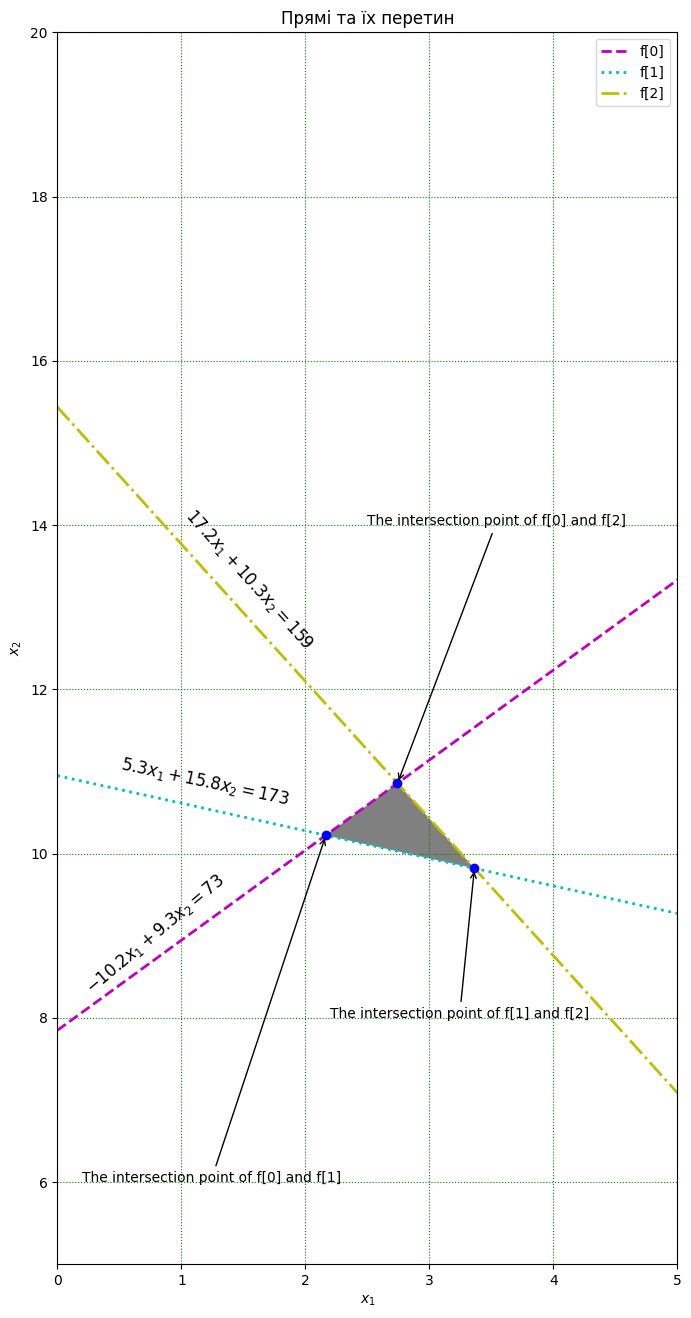

In [11]:
lines = [
    (-10.2, 9.3, 73, "m", "--", "f[0]"),
    (5.3, 15.8, 173, "c", ":", "f[1]"),
    (17.2, 10.3, 159, "y", "-.", "f[2]")
]

positions = [(0.2, 6), (2.5, 14), (2.2, 8)] 
count = 0

x = np.linspace(0, 15, 300)
fig, ax = plt.subplots(figsize=(8,16), dpi=100)

for a, b, c, color, style, label in lines:
    y = (c - a * x ) / b
    ax.plot(x, y, color=color, linestyle=style, linewidth=2, label=label)

intersection_points = []  
for i in range(len(lines)):
    for j in range(i + 1, len(lines)):
        A = np.array([[lines[i][0], lines[i][1]],
                      [lines[j][0], lines[j][1]]])
        C = np.array([lines[i][2], lines[j][2]])
        point = np.linalg.solve(A, C)
        intersection_points.append(point)
        ax.plot(point[0], point[1], "bo")

        ax.annotate(f"The intersection point of f[{i}] and f[{j}]", 
                    xy = (point[0], point[1]),
                    xytext = positions[count],  
                    arrowprops = dict(arrowstyle='->'))
        count += 1

if len(intersection_points) >= 3:
    x_coords = [p[0] for p in intersection_points]
    y_coords = [p[1] for p in intersection_points]
    ax.fill(x_coords, y_coords, 'gray')
    
ax.text(0.2, 8.3, "$-10.2x_1 + 9.3x_2 = 73$", color="black", fontsize=12, rotation = 40)
ax.text(0.5, 10.6, "$5.3x_1 + 15.8x_2 = 173$", color="black", fontsize=12, rotation = -12)
ax.text(1, 12.5, "$17.2x_1 + 10.3x_2 = 159$", color="black", fontsize=12, rotation = -48)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_title("Прямі та їх перетин")
ax.grid(True, linestyle=":", color="g")
ax.legend()
ax.set_xlim(0, 5)
ax.set_ylim(5, 20)

plt.savefig("my_figure.png")
plt.show()